In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.callbacks import TensorBoard
from seaborn import heatmap

In [2]:
# Loading back the data

import pickle

with open("X.pkl", "rb") as handle:
    X = pickle.load(handle)
with open("Y.pkl", "rb") as handle:
    Y = pickle.load(handle)
with open("classes.pkl", "rb") as handle:
    classes = pickle.load(handle)

In [3]:
X = X/255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [5]:
model = tf.keras.Sequential()

dense_num = 0
conv_num = 3
layers = 64

# First Convolutional Layer
model.add(Conv2D(layers, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Remaining Convolutional Layers
for _ in range(conv_num-1):
    model.add(Conv2D(layers, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

# 3D feature maps to 1D feature vector
model.add(Flatten())

# Dense Layers
for _ in range(dense_num):
    model.add(Dense(layers))
    model.add(Activation('relu'))

# Final Dense Layer to shrink to 3 ouput
model.add(Dense(3))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [7]:
tensorboard = TensorBoard(log_dir="logs/CNN-Trained")

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[tensorboard])

Train on 2560 samples, validate on 854 samples
Epoch 1/50
2560/2560 [==============================] - 2s 919us/sample - loss: 1.0054 - acc: 0.4598 - val_loss: 0.8213 - val_acc: 0.5867
Epoch 2/50
2560/2560 [==============================] - 1s 305us/sample - loss: 0.5701 - acc: 0.7688 - val_loss: 0.4224 - val_acc: 0.8290
Epoch 3/50
2560/2560 [==============================] - 1s 305us/sample - loss: 0.3259 - acc: 0.8891 - val_loss: 0.2773 - val_acc: 0.8946
Epoch 4/50
2560/2560 [==============================] - 1s 305us/sample - loss: 0.2153 - acc: 0.9273 - val_loss: 0.2500 - val_acc: 0.8993
Epoch 5/50
2560/2560 [==============================] - 1s 308us/sample - loss: 0.1555 - acc: 0.9523 - val_loss: 0.1758 - val_acc: 0.9461
Epoch 6/50
2560/2560 [==============================] - 1s 305us/sample - loss: 0.1085 - acc: 0.9680 - val_loss: 0.1083 - val_acc: 0.9590
Epoch 7/50
2560/2560 [==============================] - 1s 307us/sample - loss: 0.0712 - acc: 0.9824 - val_loss: 0.0928 - val

In [8]:
model.evaluate(X_test, y_test)

854/854 [==============================] - 0s 130us/sample - loss: 0.0338 - acc: 0.9953


[0.03384877526806831, 0.99531615]

In [14]:
predictions = model.predict(X_test)

y_pred = []

for p in predictions:
    y_pred.append(np.argmax(p))

y_pred = np.array(y_pred)

print(y_pred)

[0 2 2 0 1 0 0 2 1 2 1 1 2 2 0 0 2 0 1 1 2 1 2 2 2 2 2 1 2 0 1 1 0 2 0 1 1
 2 0 0 1 0 2 1 2 1 0 0 1 0 0 2 1 0 1 1 2 2 1 1 2 1 2 2 0 0 1 0 2 2 1 0 2 2
 1 2 0 0 1 2 0 1 0 2 1 1 0 1 1 0 2 1 0 0 2 2 2 0 2 2 0 2 0 0 0 0 2 1 1 0 2
 0 1 0 0 0 2 1 0 0 0 2 2 1 2 2 1 1 2 0 1 2 2 2 0 2 0 1 2 0 0 1 1 0 2 0 2 0
 1 2 1 0 1 0 2 0 0 1 0 2 2 0 1 1 1 0 1 0 1 1 1 2 1 1 1 0 0 2 2 0 1 2 2 0 1
 2 2 1 2 0 2 0 1 1 2 2 1 1 2 1 0 2 1 1 2 0 2 1 1 1 1 2 1 2 0 0 1 0 1 1 2 2
 2 0 1 1 0 1 1 0 0 1 1 2 1 0 1 0 0 1 1 1 1 1 0 0 2 1 2 0 2 0 1 0 0 2 1 1 0
 2 1 1 0 2 1 0 0 1 2 0 1 2 1 2 1 1 2 2 0 0 1 2 1 1 2 0 1 1 1 1 2 2 1 2 1 0
 0 2 0 1 1 1 0 0 2 2 0 0 1 2 0 2 1 1 1 1 0 0 1 1 0 2 0 2 1 1 2 0 0 1 0 0 1
 0 2 0 1 1 0 1 2 0 0 0 0 1 0 2 0 0 0 2 1 2 2 2 1 0 2 2 2 2 0 1 1 1 2 2 1 2
 0 0 2 1 1 2 2 1 1 0 1 1 0 2 0 2 1 0 0 1 0 0 0 0 0 0 1 1 1 2 0 2 2 0 0 2 2
 2 1 1 0 1 0 2 0 2 1 2 0 0 1 1 0 1 0 2 2 1 2 1 0 1 0 2 1 2 0 2 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 2 0 2 2 0 0 2 2 1 0 1 0 2 0 2 0 2 2 0 0 2 2 1 2 0 2 0 2 1
 2 0 2 1 0 0 0 2 2 2 2 0 

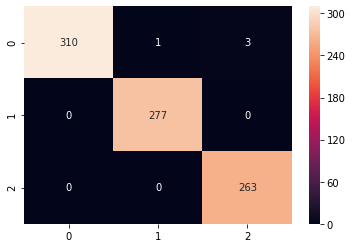

In [22]:
heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
model.save("model.h5")

In [ ]:
model.predict([X_test[0].reshape(-1, 40, 50, 1)])

In [24]:
import cv2

In [26]:
cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (50, 40), interpolation=cv2.INTER_AREA)
    
    resized = resized / 255.0
    prediction = classes[np.argmax(model.predict([resized.reshape(-1, 40, 50, 1)]))]
    
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10, 400)
    fontScale              = 3
    fontColor              = (255,255,255)
    lineType               = 10

    cv2.putText(img, prediction, 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)
    
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()